# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
import statsmodels.api as sm

In [2]:
import sklearn 

In [3]:
from sklearn.linear_model import LinearRegression

# LOADING DATA

In [4]:
data = pd.read_csv('Boston.csv')

In [5]:
data

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# INFO ABOUT DATA

In [6]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
ID         506 non-null int64
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


# SIMPLE LINEAR REGRESSION BETWEEN 'lstat' AND 'medv' COLUMNS

In [24]:
data1 = DataFrame(data['lstat']) #storing the column 'lstat' in another dataframe

In [25]:
data1

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
5,5.21
6,12.43
7,19.15
8,29.93
9,17.10


In [26]:
#Implementation of Simple Linear Regression on the columns 'medv' and 'lstat'
lr = LinearRegression()
lr.fit(data1, data['medv'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr.coef_     #coefficient of lstat in linear regression

array([-0.95004935])

In [28]:
lr.intercept_   #intercept i.e. constant value in linear regression

34.55384087938311

In [31]:
lr.score(data1, data['medv'])   # R^2 score of our model

0.5441462975864799

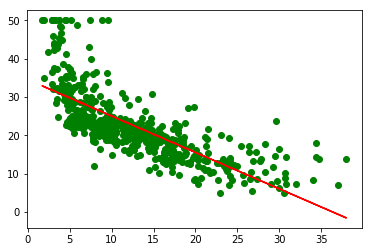

In [60]:
plt.scatter(data1, data['medv'], color = 'green')   #plotting all the data points in our data
plt.plot(data1, lr.predict(data1), color = 'red')   #plotting the results of our model 


# USING STATSMODELS FOR MORE STATISTICS

In [39]:
#statsmodels provides a lot more statistics as compared to sklearn linear regression 
#therefore we train our model in statsmodels as well 

X = data['lstat']   
y = data['medv']
X = sm.add_constant(X)     #adding constant 1 to training data

model = sm.OLS(y,X).fit()

In [40]:
#the below table provides coefficients, intercepts, their confidence interval, R-squared, adjusted R-squared, F score and standard error of coefficients

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 27 Feb 2019   Prob (F-statistic):           5.08e-88
Time:                        19:04:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [59]:
model.predict([(1,5),(1,10),(1,15)])   #predicting the v

array([29.80359411, 25.05334734, 20.30310057])